# An Analysis of all restaurants on the Michelin Guide

For those who know me, you would know that I like to be wined and dined. I am not particularly a Michelin star catcher but I do not mind an occassional Michelin star meal on a special occassion. These Michelin star restaurants are dotted all over the world and I have been lucky enough to visit a few of them. 

This analysis aims to find
- The city and country with the most Michelin restaurants; and
- The best value Michelin restaurant in the world.


In [426]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [427]:
#Load datase to df
df = pd.read_csv('michelin_my_maps.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17746 entries, 0 to 17745
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   17746 non-null  object 
 1   Address                17746 non-null  object 
 2   Location               17746 non-null  object 
 3   Price                  17745 non-null  object 
 4   Cuisine                17746 non-null  object 
 5   Longitude              17746 non-null  float64
 6   Latitude               17746 non-null  float64
 7   PhoneNumber            17377 non-null  float64
 8   Url                    17746 non-null  object 
 9   WebsiteUrl             15242 non-null  object 
 10  Award                  17746 non-null  object 
 11  GreenStar              17746 non-null  int64  
 12  FacilitiesAndServices  16827 non-null  object 
 13  Description            17746 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.9+

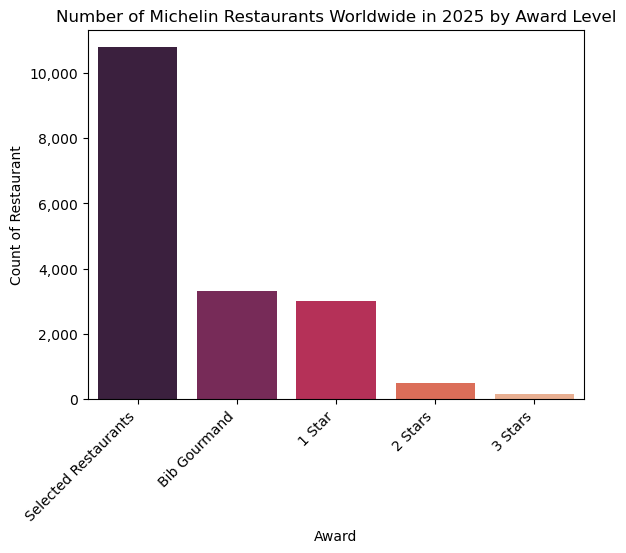

In [428]:
#number of awards given to restaurants

award = df.groupby('Award').size().sort_values(ascending=False).reset_index(name = 'Count')

award

sns.barplot(data= award, x = 'Award', y = 'Count', hue = 'Award', palette = 'rocket')
plt.xlabel('Award')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Count of Restaurant')
plt.title('Number of Michelin Restaurants Worldwide in 2025 by Award Level')
import matplotlib as mpl
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [429]:
#City with the most Michelin Restaurants

top_city = df.pivot_table(index = ['Award'], columns= ['Location'], aggfunc= 'size')
top_city.loc['Total'] = top_city.sum()
top_city = top_city[top_city.loc['Total'].sort_values(ascending=False).index]
top_city = top_city.drop('Total')
top_city



Location,"Tokyo, Japan","Paris, France","London, United Kingdom",Singapore,"Kyoto, Japan","New York, USA","Osaka, Japan","Seoul, South Korea","Bangkok, Thailand","Taipei, Taiwan",...,"Isneauville, France","Isla Mujeres, Mexico","Inverness, USA","Iseo, Italy","Ischia, Italy","Irouléguy, France","Irissarry, France","Inworth, United Kingdom","Inverness, United Kingdom","Škofja Loka, Slovenia"
Award,,,,,,,,,,,,,,,,,,,,,
1 Star,132.0,94.0,63.0,38.0,78.0,47.0,71.0,27.0,24.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Stars,25.0,15.0,14.0,6.0,17.0,12.0,10.0,9.0,7.0,4.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3 Stars,12.0,10.0,6.0,3.0,5.0,5.0,3.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bib Gourmand,110.0,30.0,42.0,81.0,55.0,44.0,62.0,58.0,40.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Selected Restaurants,232.0,316.0,209.0,160.0,102.0,138.0,97.0,91.0,97.0,80.0,...,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0


In [430]:
#Plot city with the most Michelin Restaurants

df_top_city_count = df.groupby(['Award', 'Location']).size().reset_index(name = 'res_count')
df_top_city_count.sort_values(by = 'res_count', ascending= False, inplace = True)
df_top_city_count

,Award,Location,res_count
5994,Selected Restaurants,"Paris, France",316
6986,Selected Restaurants,"Tokyo, Japan",232
5354,Selected Restaurants,"London, United Kingdom",209
6760,Selected Restaurants,Singapore,160
5791,Selected Restaurants,"New York, USA",138
...,...,...,...
2693,Bib Gourmand,"Mora de Rubielos, Spain",1
2692,Bib Gourmand,"Montrigiasco, Italy",1
2691,Bib Gourmand,"Montreux, Switzerland",1
2690,Bib Gourmand,"Montpellier, France",1


In [431]:
#Awards

awards = ['Selected Restaurants', 'Bib Gourmand', '1 Star', '2 Stars', '3 Stars']

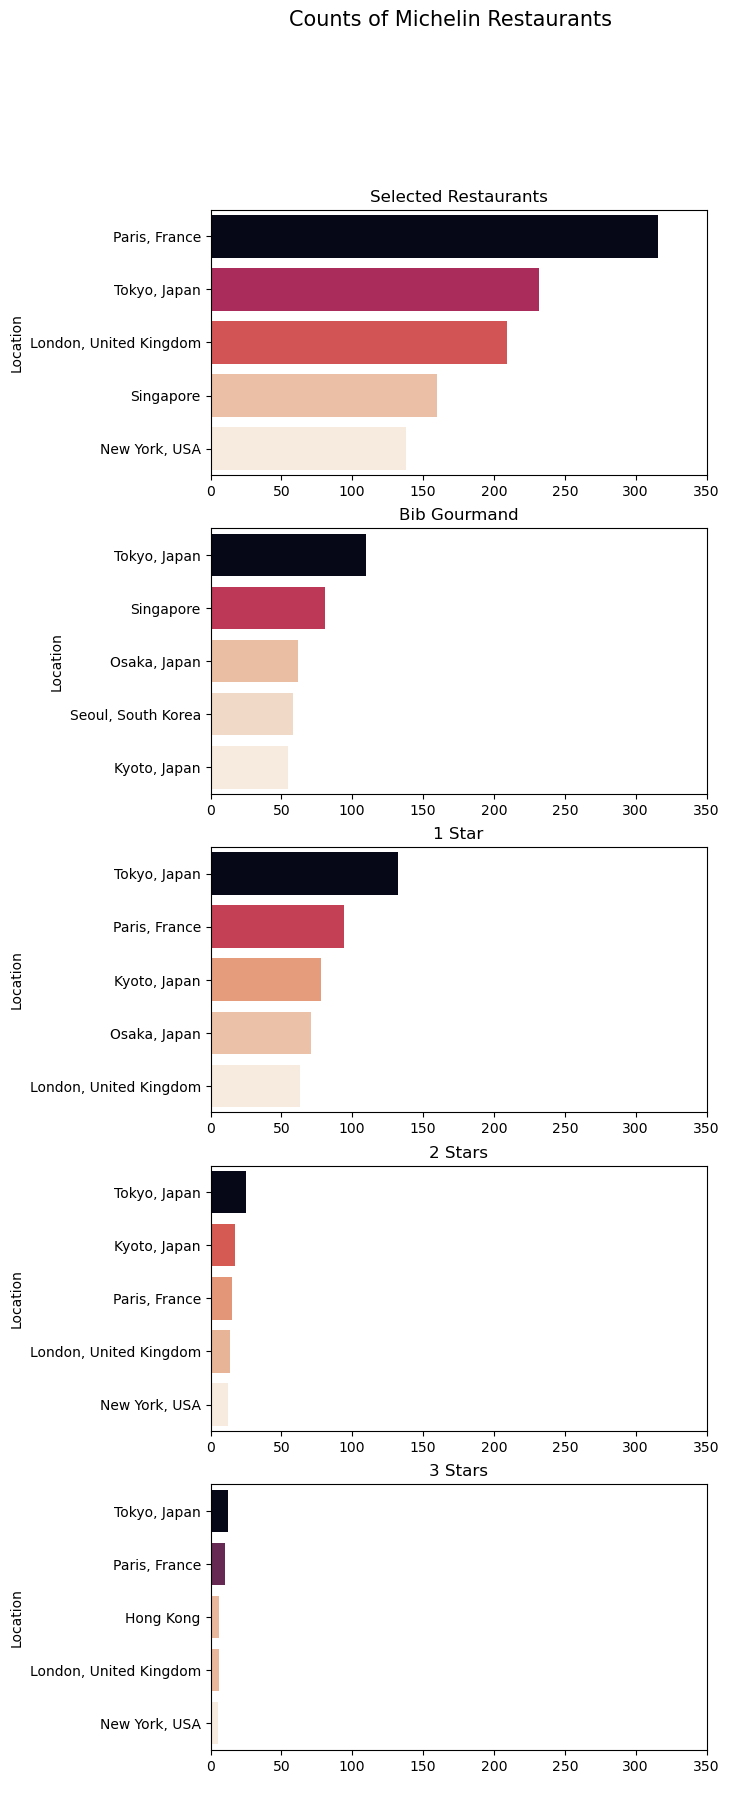

In [432]:
#Plot 
fig, ax = plt.subplots(len(awards),1)

for i, award in enumerate(awards):
    df_plot = df_top_city_count[df_top_city_count['Award'] == award].head(5)
    sns.barplot(data = df_plot, x = 'res_count', y = 'Location', ax = ax[i], hue = 'res_count', palette = 'rocket_r')
    ax[i].set_title(award)
    ax[i].set_xlabel(' ')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 350)

fig.set_figheight(20)
fig.suptitle('Counts of Michelin Restaurants', fontsize = 15)

plt.show()

In [433]:
#Split country into its own column

# df_location = df['Location'].str.split(', ', n=1, expand = True).rename(columns = {0: 'City', 1: 'Country'})

# df_location.sample(10)

df[['City', 'Country']] = df['Location'].str.split(', ', n=1, expand = True)



Noted that in the ```Country``` column, there are less datapoints than that of ```City``` which means some ```Location``` do not have a country specificied. 

These are usually small countries or city states.

The following codes are there to find out what are the names of the ```City```and replace the ```Country```with the same name instead of leaving it as ```null```. 

In [434]:
#Find out what cities are these null countries
null_country = df[df['Country'].isnull()].index.tolist()
df.loc[null_country, 'City'].unique().tolist()

['Singapore', 'Hong Kong', 'Macau', 'Dubai', 'Abu Dhabi', 'Luxembourg']

Now that we know all these "cities" are essentially city states or small countries, we can use ```fillna()``` to replace any ```null```values in the ```Country``` column. 

In [435]:
#Fill null Country with City 
df['Country'] = df['Country'].fillna(df['City'])
df_HK = df[df['City'] == 'Hong Kong']
df_HK

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,GreenStar,FacilitiesAndServices,Description,City,Country
144,Ta Vie,"2F, The Pottinger Hotel, 21 Stanley Street, Ce...",Hong Kong,$$$$,Innovative,114.155290,22.282766,8.522669e+10,https://guide.michelin.com/en/hong-kong-region...,https://www.tavie.com.hk,3 Stars,0,"Air conditioning,Wheelchair access","The mantra of chef Hideaki Sato is “pure, simp...",Hong Kong,Hong Kong
145,Caprice,"6F, Four Seasons Hotel, 8 Finance Street, Cent...",Hong Kong,$$$$,French Contemporary,114.156610,22.286649,8.523197e+10,https://guide.michelin.com/en/hong-kong-region...,https://www.fourseasons.com/hongkong/dining/re...,3 Stars,0,"Air conditioning,Car park,Great view,Interesti...",One of Hong Kong's most glamorous and elegant ...,Hong Kong,Hong Kong
146,8 1/2 Otto e Mezzo - Bombana,"Shop 202, 2F, Alexandra House, 18 Chater Road,...",Hong Kong,$$$$,Italian,114.158670,22.281464,8.522538e+10,https://guide.michelin.com/en/hong-kong-region...,https://www.ottoemezzobombana.com,3 Stars,0,"Air conditioning,Car park,Interesting wine lis...","Owner-chef Umberto Bombana’s restaurant, which...",Hong Kong,Hong Kong
148,Forum,"1F, Sino Plaza, 255-257 Gloucester Road, Cause...",Hong Kong,$$$$,Cantonese,114.182191,22.281397,8.522870e+10,https://guide.michelin.com/en/hong-kong-region...,http://www.forumrestaurant1977.com,3 Stars,0,"Air conditioning,Car park,Interesting wine lis...","Co-founder and chef of this upmarket spot, the...",Hong Kong,Hong Kong
150,T'ang Court,"1-2F, The Langham Hotel, 8 Peking Road, Tsim S...",Hong Kong,$$$,Cantonese,114.169800,22.296572,8.522133e+10,https://guide.michelin.com/en/hong-kong-region...,https://www.langhamhotels.com/en/the-langham/h...,3 Stars,0,"Air conditioning,Car park,Restaurant offering ...",Comfort and luxury partly explain the populari...,Hong Kong,Hong Kong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17194,Yuè (Causeway Bay),"Shop 1301, Food Forum, Time Square, 1 Matheson...","Hong Kong, Hong Kong SAR China",$$,Cantonese,114.182082,22.278351,8.522838e+10,https://guide.michelin.com/en/hong-kong-region...,https://lubuds.com/yue-times-square-causeway-bay,Selected Restaurants,0,"Air conditioning,Car park",Having worked in some prestigious kitchens in ...,Hong Kong,Hong Kong SAR China
17196,The Merchants,"43-45F, Forty-Five, Gloucester Tower, Landmark...","Hong Kong, Hong Kong SAR China",$$$,Shanghainese,114.157766,22.281566,8.522155e+10,https://guide.michelin.com/en/hong-kong-region...,https://themerchantshk.com/,Selected Restaurants,0,"Air conditioning,Car park,Great view",The top three floors of a prestigious office t...,Hong Kong,Hong Kong SAR China
17197,Tuber Umberto Bombana,"Shop 113A, 1F, K11 Musea, 18 Salisbury Road, T...","Hong Kong, Hong Kong SAR China",$$$$,Italian,114.174595,22.294305,8.522133e+10,https://guide.michelin.com/en/hong-kong-region...,http://www.octavo.com.hk,Selected Restaurants,0,"Air conditioning,Car park,Interesting wine list",This dining concept by the eponymous chef is d...,Hong Kong,Hong Kong SAR China
17198,Hong Kong Cuisine,"1F, Elegance Court, 2-4 Tsoi Tak Street, Happy...","Hong Kong, Hong Kong SAR China",$$$,Chinese Contemporary,114.185713,22.269546,8.522893e+10,https://guide.michelin.com/en/hong-kong-region...,https://www.1983hkc.com/,Selected Restaurants,0,"Air conditioning,Bring your own bottle,Restaur...","This upstairs restaurant is helmed by Chef Li,...",Hong Kong,Hong Kong SAR China


After a quick check, I found out that some of the ```Country``` for Hong Kong was named "Hong Kong SAR China" instead of just "Hong Kong". I need to clean this up and 

In [436]:
#Changing "Hong Kong SAR China" in the ```Country``` column into "Hong Kong".
df.loc[df['Country'] == 'Hong Kong SAR China', 'Country'] = 'Hong Kong'

df_HK = df[df['City'] == 'Hong Kong']
df_HK

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,GreenStar,FacilitiesAndServices,Description,City,Country
144,Ta Vie,"2F, The Pottinger Hotel, 21 Stanley Street, Ce...",Hong Kong,$$$$,Innovative,114.155290,22.282766,8.522669e+10,https://guide.michelin.com/en/hong-kong-region...,https://www.tavie.com.hk,3 Stars,0,"Air conditioning,Wheelchair access","The mantra of chef Hideaki Sato is “pure, simp...",Hong Kong,Hong Kong
145,Caprice,"6F, Four Seasons Hotel, 8 Finance Street, Cent...",Hong Kong,$$$$,French Contemporary,114.156610,22.286649,8.523197e+10,https://guide.michelin.com/en/hong-kong-region...,https://www.fourseasons.com/hongkong/dining/re...,3 Stars,0,"Air conditioning,Car park,Great view,Interesti...",One of Hong Kong's most glamorous and elegant ...,Hong Kong,Hong Kong
146,8 1/2 Otto e Mezzo - Bombana,"Shop 202, 2F, Alexandra House, 18 Chater Road,...",Hong Kong,$$$$,Italian,114.158670,22.281464,8.522538e+10,https://guide.michelin.com/en/hong-kong-region...,https://www.ottoemezzobombana.com,3 Stars,0,"Air conditioning,Car park,Interesting wine lis...","Owner-chef Umberto Bombana’s restaurant, which...",Hong Kong,Hong Kong
148,Forum,"1F, Sino Plaza, 255-257 Gloucester Road, Cause...",Hong Kong,$$$$,Cantonese,114.182191,22.281397,8.522870e+10,https://guide.michelin.com/en/hong-kong-region...,http://www.forumrestaurant1977.com,3 Stars,0,"Air conditioning,Car park,Interesting wine lis...","Co-founder and chef of this upmarket spot, the...",Hong Kong,Hong Kong
150,T'ang Court,"1-2F, The Langham Hotel, 8 Peking Road, Tsim S...",Hong Kong,$$$,Cantonese,114.169800,22.296572,8.522133e+10,https://guide.michelin.com/en/hong-kong-region...,https://www.langhamhotels.com/en/the-langham/h...,3 Stars,0,"Air conditioning,Car park,Restaurant offering ...",Comfort and luxury partly explain the populari...,Hong Kong,Hong Kong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17194,Yuè (Causeway Bay),"Shop 1301, Food Forum, Time Square, 1 Matheson...","Hong Kong, Hong Kong SAR China",$$,Cantonese,114.182082,22.278351,8.522838e+10,https://guide.michelin.com/en/hong-kong-region...,https://lubuds.com/yue-times-square-causeway-bay,Selected Restaurants,0,"Air conditioning,Car park",Having worked in some prestigious kitchens in ...,Hong Kong,Hong Kong
17196,The Merchants,"43-45F, Forty-Five, Gloucester Tower, Landmark...","Hong Kong, Hong Kong SAR China",$$$,Shanghainese,114.157766,22.281566,8.522155e+10,https://guide.michelin.com/en/hong-kong-region...,https://themerchantshk.com/,Selected Restaurants,0,"Air conditioning,Car park,Great view",The top three floors of a prestigious office t...,Hong Kong,Hong Kong
17197,Tuber Umberto Bombana,"Shop 113A, 1F, K11 Musea, 18 Salisbury Road, T...","Hong Kong, Hong Kong SAR China",$$$$,Italian,114.174595,22.294305,8.522133e+10,https://guide.michelin.com/en/hong-kong-region...,http://www.octavo.com.hk,Selected Restaurants,0,"Air conditioning,Car park,Interesting wine list",This dining concept by the eponymous chef is d...,Hong Kong,Hong Kong
17198,Hong Kong Cuisine,"1F, Elegance Court, 2-4 Tsoi Tak Street, Happy...","Hong Kong, Hong Kong SAR China",$$$,Chinese Contemporary,114.185713,22.269546,8.522893e+10,https://guide.michelin.com/en/hong-kong-region...,https://www.1983hkc.com/,Selected Restaurants,0,"Air conditioning,Bring your own bottle,Restaur...","This upstairs restaurant is helmed by Chef Li,...",Hong Kong,Hong Kong


Checking other previously ```null``` countries have been cleared. 

In [437]:
df_UAE = df[df['Country'] == 'United Arab Emirates']
df_UAE

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,GreenStar,FacilitiesAndServices,Description,City,Country


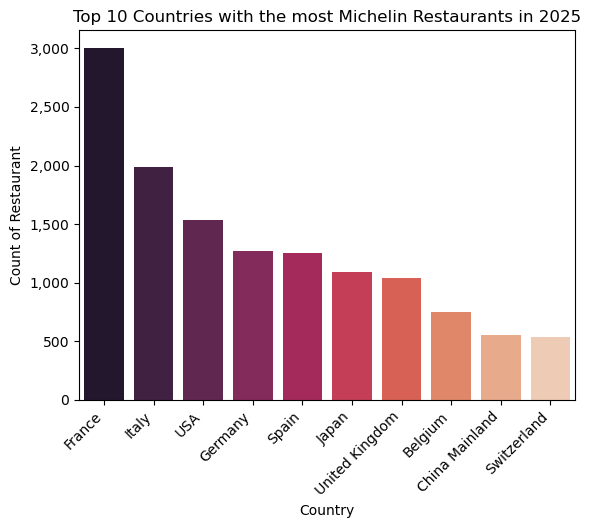

In [438]:
#Plot country with the most amount of Michelin Restaurants

df_plot = df.groupby('Country').size().sort_values(ascending=False).head(10).reset_index(name = 'Count')

sns.barplot(data= df_plot, x = 'Country', y = 'Count', hue = 'Country', palette = 'rocket')
plt.xlabel('Country')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Count of Restaurant')
plt.title('Top 10 Countries with the most Michelin Restaurants in 2025')
import matplotlib as mpl
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

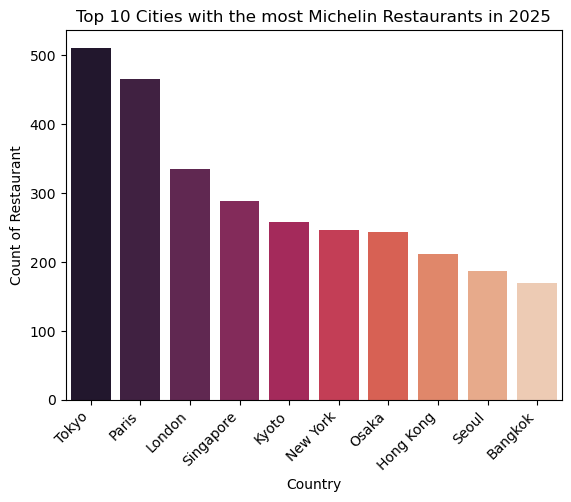

In [439]:
#Plot city with the most amount of Michelin Restaurants
df_plot = df.groupby('City').size().sort_values(ascending=False).head(10).reset_index(name = 'Count')

sns.barplot(data= df_plot, x = 'City', y = 'Count', hue = 'City', palette = 'rocket')
plt.xlabel('Country')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Count of Restaurant')
plt.title('Top 10 Cities with the most Michelin Restaurants in 2025')
import matplotlib as mpl
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

It's great that we found out France has the most Michelin Restaurants in the world in 2025. However, I am bougie and only wants to dine in restaurants that are awarded stars. I do not care about restaurants that are awarded as "Selected Restaurants" or " Bib Gourmand". Let's find out how many restaurants are in each categories for these top 10 countries. 

In [440]:
df_country = df.pivot_table(index = 'Country', columns= 'Award', aggfunc='size', fill_value=0)

#Reorder the df accorindg to number of awards in each country
df_country.loc['Total'] = df_country.sum()

df_country = df_country[df_country.loc['Total'].sort_values(ascending=False).index]

#Drop Total row
df_country = df_country.drop('Total')

#Add a Total column in the pivot table to summarise the number of awards in each country
df_country["Total"] = df_country.sum(axis=1)

#Sort country according to the total number of awards in each country
df_country = df_country.sort_values(by = 'Total', ascending = False)

df_country.drop(columns = 'Total', inplace = True)

df_country

Award,Selected Restaurants,Bib Gourmand,1 Star,2 Stars,3 Stars
Country,,,,,
France,2014,374,512,74,30
Italy,1346,250,336,38,14
USA,892,382,214,32,14
Germany,752,195,266,47,10
Spain,750,213,241,32,16
Japan,475,245,299,56,20
United Kingdom,709,131,164,23,10
Belgium,495,124,111,21,2
China Mainland,244,183,109,18,4


Now that the table is sorted according, I am going to plot a stacked bar chart for the top 10 countries with the most Michelin restaurants in the world.

*Note: plotting stacked bar chart was not part of the course that I took. So this is all self-taught by google and chatGPT.* 

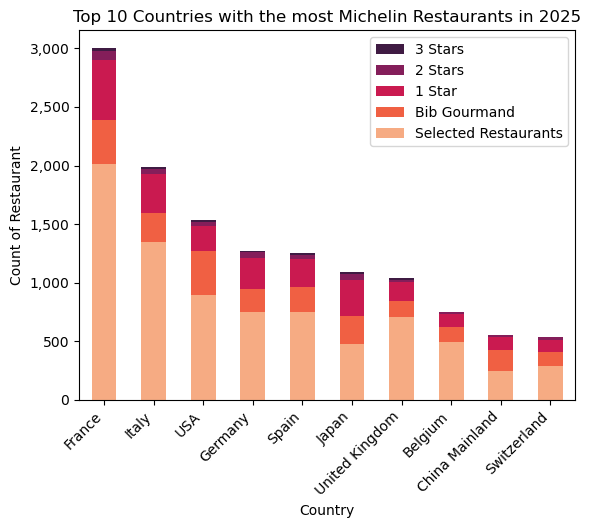

In [441]:
#Plot stacked bar chart for top 10 countries with the most Michelin restaurants in the world.

df_plot = df_country.head(10)
colours = sns.set_palette('rocket_r', n_colors=len(df_plot.columns))
df_plot.plot(kind = 'bar', stacked = True, color= colours)

plt.xlabel('Country')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Count of Restaurant')
plt.title('Top 10 Countries with the most Michelin Restaurants in 2025')
import matplotlib as mpl
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(reverse = True)
plt.show()

I want to find out the best countries to go if I only want to go "starred" restaurants, i.e. excluding restaurants that are awared "Bib Gourmand" and "Selected Restaurants". 

In [442]:
df_country_starred = df.pivot_table(index = 'Country', columns = 'Award', aggfunc = 'size', fill_value=0)
df_country_starred.drop(columns = ['Bib Gourmand', 'Selected Restaurants'], inplace = True)

#Reorder the df accorindg to number of awards in each country
df_country_starred.loc['Total'] = df_country_starred.sum()

df_country_starred = df_country_starred[df_country_starred.loc['Total'].sort_values(ascending=False).index]

#Drop Total row
df_country_starred = df_country_starred.drop('Total')

#Add a Total column in the pivot table to summarise the number of awards in each country
df_country_starred["Total"] = df_country_starred.sum(axis=1)

#Sort country according to the total number of awards in each country
df_country_starred = df_country_starred.sort_values(by = 'Total', ascending = False)

df_country_starred.drop(columns = 'Total', inplace = True)

df_country_starred

Award,1 Star,2 Stars,3 Stars
Country,,,
France,512,74,30
Italy,336,38,14
Japan,299,56,20
Germany,266,47,10
Spain,241,32,16
USA,214,32,14
United Kingdom,164,23,10
Belgium,111,21,2
Switzerland,104,25,4


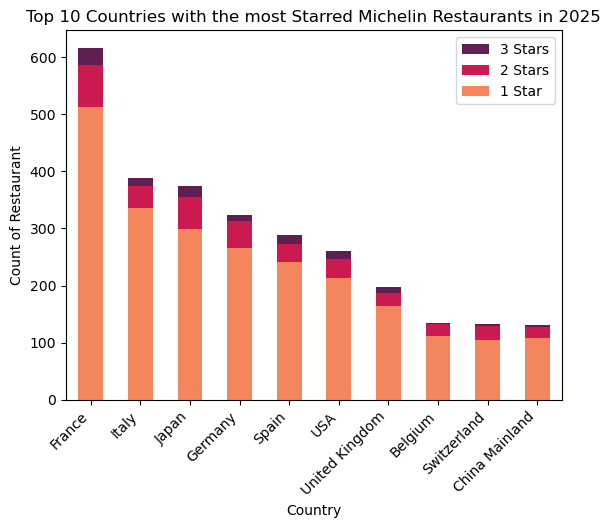

In [443]:
#Plot the top 10 countries with the most starred Michelin Restaurants. 
df_plot = df_country_starred.head(10)
colours = sns.set_palette('rocket_r', n_colors=len(df_plot.columns))
df_plot.plot(kind = 'bar', stacked = True, color= colours)

plt.xlabel('Country')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Count of Restaurant')
plt.title('Top 10 Countries with the most Starred Michelin Restaurants in 2025')
import matplotlib as mpl
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(reverse = True)
plt.show()

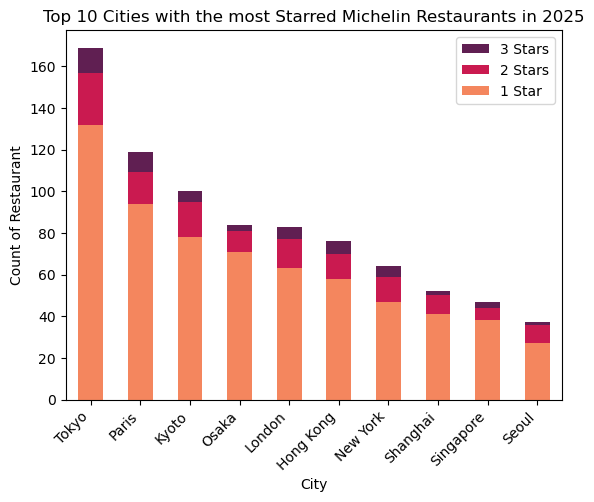

In [444]:
#Plot top 10 citie with the most Starred michelin Restaurants in 2025
df_city_starred = df.pivot_table(index = 'City', columns = 'Award', aggfunc = 'size', fill_value=0)
df_city_starred.drop(columns = ['Bib Gourmand', 'Selected Restaurants'], inplace = True)

#Reorder the df accorindg to number of awards in each country
df_city_starred.loc['Total'] = df_city_starred.sum()

df_city_starred = df_city_starred[df_city_starred.loc['Total'].sort_values(ascending=False).index]

#Drop Total row
df_city_starred = df_city_starred.drop('Total')

#Add a Total column in the pivot table to summarise the number of awards in each country
df_city_starred["Total"] = df_city_starred.sum(axis=1)

#Sort country according to the total number of awards in each country
df_city_starred = df_city_starred.sort_values(by = 'Total', ascending = False)

df_city_starred.drop(columns = 'Total', inplace = True)

df_plot = df_city_starred.head(10)
colours = sns.set_palette('rocket_r', n_colors=len(df_plot.columns))
df_plot.plot(kind = 'bar', stacked = True, color= colours)

plt.xlabel('City')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Count of Restaurant')
plt.title('Top 10 Cities with the most Starred Michelin Restaurants in 2025')
import matplotlib as mpl
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(reverse = True)
plt.show()

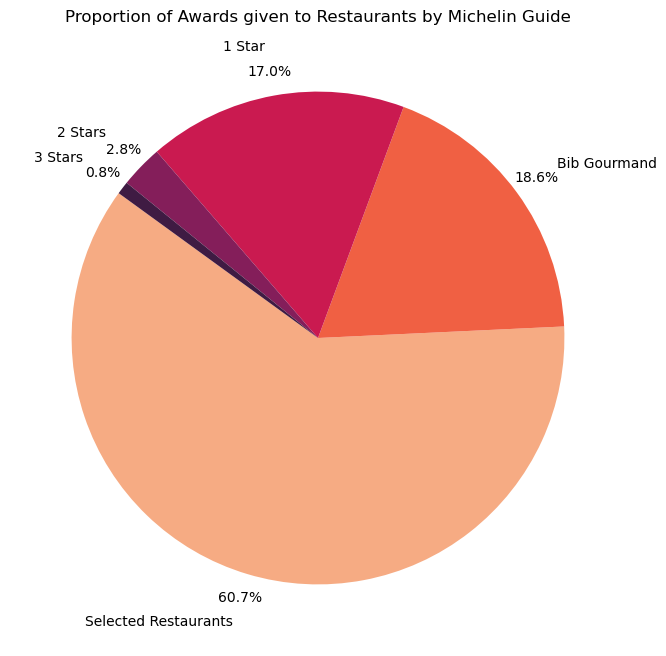

In [445]:
#what are the proportions of awards given to restaurants by the Michelin guide?

award_prop = df.groupby('Award').size().reset_index(name = 'award_count')
award_prop = award_prop.sort_values(by= 'award_count', ascending=False).set_index('Award')
awards = award_prop.index.tolist()
award_counts = award_prop['award_count'].tolist()

colours = sns.set_palette('rocket_r', n_colors=len(awards))
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(award_counts, labels=awards, colors=colours, startangle=144,autopct='%1.1f%%', labeldistance=1.2, pctdistance=1.1)

plt.ylabel('')
plt.title('Proportion of Awards given to Restaurants by Michelin Guide')
plt.show()

Find out which cuisine is most popular among Michelin guide.

In [446]:
cuisine = df.pivot_table(index = 'Cuisine', columns = 'Award', aggfunc = 'size', fill_value=0)
cuisine.sample(10)

Award,1 Star,2 Stars,3 Stars,Bib Gourmand,Selected Restaurants
Cuisine,,,,,
"Piedmontese, Contemporary",2,0,0,0,8
"Classic Cuisine, Belgian",1,0,0,0,3
"French, American",0,0,0,1,4
"Barbecue, Ethiopian",0,0,0,0,1
"Modern Cuisine, Middle Eastern",0,0,0,0,1
"Campanian, Home Cooking",0,0,0,1,1
"Cuisine from Valtellina, Traditional Cuisine",0,0,0,1,0
"Contemporary, Hungarian",0,0,0,1,0
Jamaican,0,0,0,0,2


Found out that there are multiple entry for each cuisine. I need to explode this df to get a more accurate understanding of the type of cuisines available.

In [472]:
df = pd.read_csv('michelin_my_maps.csv')
df['Cuisine'] = df['Cuisine'].str.split(',')
# df_cuisine_exploded = df.explode('Cuisine')
# df_cuisine_exploded
df

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,GreenStar,FacilitiesAndServices,Description
0,Mingles,"2F, 19 Dosan-daero 67-gil, Gangnam-gu, Seoul, ...","Seoul, South Korea",₩₩₩₩,"[Korean, Korean Contemporary]",127.044260,37.525350,8.225157e+09,https://guide.michelin.com/en/seoul-capital-ar...,https://www.restaurant-mingles.com/,3 Stars,0,"Air conditioning,Interesting wine list,Valet p...",Chef Kang Min-goo's keen eye for detail shines...
1,L'Enclume,"Cavendish Street, Cartmel, LA11 6QA, United Ki...","Cartmel, United Kingdom",££££,[Creative British],-2.953868,54.201771,4.415395e+11,https://guide.michelin.com/en/cumbria/cartmel/...,https://www.lenclume.co.uk/,3 Stars,1,"Air conditioning,Garden or park,Interesting wi...",Exceptional produce is the bedrock of everythi...
2,Alain Ducasse at The Dorchester,"Park Lane, Mayfair, London, W1K 1QA, United Ki...","London, United Kingdom",££££,[French],-0.152575,51.507338,4.420763e+11,https://guide.michelin.com/en/greater-london/l...,https://www.alainducasse-dorchester.com/,3 Stars,0,"Air conditioning,Interesting wine list,Restaur...",Executive Chef Jean-Philippe Blondet is bringi...
3,Hélène Darroze at The Connaught,"Carlos Place, Mayfair, London, W1K 2AL, United...","London, United Kingdom",££££,[Modern Cuisine],-0.149290,51.510188,4.420315e+11,https://guide.michelin.com/en/greater-london/l...,https://www.the-connaught.co.uk/restaurants-ba...,3 Stars,0,"Air conditioning,Interesting wine list,Restaur...",A wood-panelled dining room within the histori...
4,Restaurant Gordon Ramsay,"68-69 Royal Hospital Road, Chelsea, London, SW...","London, United Kingdom",££££,[French],-0.162177,51.485438,4.420735e+11,https://guide.michelin.com/en/greater-london/l...,https://www.gordonramsayrestaurants.com/restau...,3 Stars,0,"Air conditioning,Interesting wine list,Restaur...",He may be one of the most famous chefs on the ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17741,La Finestra in Cucina,"Platnérská 13, Prague, 110 00, Czech Republic","Prague, Czech Republic",€,[Italian],14.416367,50.087338,4.202223e+11,https://guide.michelin.com/en/prague/prague/re...,https://lafinestra.lacollezione.cz/en,Selected Restaurants,0,"Air conditioning,Booking essential - dinner,In...","Set in Prague's Old Town, this is a great esta..."
17742,Kampa Park,"Na Kampe 8b, Malá Strana, Prague, 118 00, Czechia","Prague, Czech Republic",€€€,[Modern Cuisine],14.408992,50.087038,4.202968e+11,https://guide.michelin.com/en/prague/prague/re...,https://kampapark.com/en/,Selected Restaurants,0,"Air conditioning,Booking essential - dinner,Gr...",Kampa Park is stunningly located by the water’...
17743,La Veranda,"Elišky Krásnohorské 2, Prague, 110 00, Czech R...","Prague, Czech Republic",€€,[Mediterranean Cuisine],14.419907,50.090262,4.202248e+11,https://guide.michelin.com/en/prague/prague/re...,https://www.laveranda.cz,Selected Restaurants,0,Air conditioning,In this restaurant with the flair of an Italia...
17744,Bockem,"Elišky Peškové 1095/5, Prague, 150 00, Czechia","Prague, Czech Republic",€€€,"[Czech, Contemporary]",14.405282,50.077414,4.200770e+12,https://guide.michelin.com/en/prague/prague/re...,https://bockem.cz/,Selected Restaurants,0,Booking essential,There’s something very endearing about this wa...


In [ ]:
# df_cuisine = df_cuisine_exploded.groupby('Cuisine')['Award'].size()
# df_cuisine

Cuisine
 Alpine                   19
 Alsatian                 10
 American                 86
 American Contemporary    22
 Andalusian                9
                          ..
Yakitori                  35
Yoshoku                    8
Yukhoe                     1
Yunnanese                  6
Zhejiang                  21
Name: Award, Length: 450, dtype: int64

In [ ]:
# df = pd.read_csv('michelin_my_maps.csv')
# index = df[df['Cuisine'].str.contains('604-0941', na=False, regex=True)].index
# print(index)

Index([], dtype='int64')


In [ ]:
# df.loc[index, 'Cuisine'] = 'Japanese'

# print(df.loc[index, 'Cuisine'])

Series([], Name: Cuisine, dtype: object)


In [476]:
# unique_cuisine = df_cuisine.index.to_list()
# unique_cuisine

In [490]:
df = pd.read_csv('michelin_my_maps.csv')

def replace_multiple_cuisines(cuisine):
    cuisines = cuisine.split(", ")  # Assuming cuisines are separated by commas
    if len(cuisines) > 1:
        return cuisines[0]  # Return the first cuisine
    return cuisine  # Return the original if only one cuisine

# Apply the function to the 'Cuisine' column
df_cuisine_grouped = df.copy()
df_cuisine_grouped['Cuisine'] = df_cuisine_grouped['Cuisine'].apply(replace_multiple_cuisines)

# Check the result
df_cuisine_grouped

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,GreenStar,FacilitiesAndServices,Description
0,Mingles,"2F, 19 Dosan-daero 67-gil, Gangnam-gu, Seoul, ...","Seoul, South Korea",₩₩₩₩,Korean,127.044260,37.525350,8.225157e+09,https://guide.michelin.com/en/seoul-capital-ar...,https://www.restaurant-mingles.com/,3 Stars,0,"Air conditioning,Interesting wine list,Valet p...",Chef Kang Min-goo's keen eye for detail shines...
1,L'Enclume,"Cavendish Street, Cartmel, LA11 6QA, United Ki...","Cartmel, United Kingdom",££££,Creative British,-2.953868,54.201771,4.415395e+11,https://guide.michelin.com/en/cumbria/cartmel/...,https://www.lenclume.co.uk/,3 Stars,1,"Air conditioning,Garden or park,Interesting wi...",Exceptional produce is the bedrock of everythi...
2,Alain Ducasse at The Dorchester,"Park Lane, Mayfair, London, W1K 1QA, United Ki...","London, United Kingdom",££££,French,-0.152575,51.507338,4.420763e+11,https://guide.michelin.com/en/greater-london/l...,https://www.alainducasse-dorchester.com/,3 Stars,0,"Air conditioning,Interesting wine list,Restaur...",Executive Chef Jean-Philippe Blondet is bringi...
3,Hélène Darroze at The Connaught,"Carlos Place, Mayfair, London, W1K 2AL, United...","London, United Kingdom",££££,Modern Cuisine,-0.149290,51.510188,4.420315e+11,https://guide.michelin.com/en/greater-london/l...,https://www.the-connaught.co.uk/restaurants-ba...,3 Stars,0,"Air conditioning,Interesting wine list,Restaur...",A wood-panelled dining room within the histori...
4,Restaurant Gordon Ramsay,"68-69 Royal Hospital Road, Chelsea, London, SW...","London, United Kingdom",££££,French,-0.162177,51.485438,4.420735e+11,https://guide.michelin.com/en/greater-london/l...,https://www.gordonramsayrestaurants.com/restau...,3 Stars,0,"Air conditioning,Interesting wine list,Restaur...",He may be one of the most famous chefs on the ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17741,La Finestra in Cucina,"Platnérská 13, Prague, 110 00, Czech Republic","Prague, Czech Republic",€,Italian,14.416367,50.087338,4.202223e+11,https://guide.michelin.com/en/prague/prague/re...,https://lafinestra.lacollezione.cz/en,Selected Restaurants,0,"Air conditioning,Booking essential - dinner,In...","Set in Prague's Old Town, this is a great esta..."
17742,Kampa Park,"Na Kampe 8b, Malá Strana, Prague, 118 00, Czechia","Prague, Czech Republic",€€€,Modern Cuisine,14.408992,50.087038,4.202968e+11,https://guide.michelin.com/en/prague/prague/re...,https://kampapark.com/en/,Selected Restaurants,0,"Air conditioning,Booking essential - dinner,Gr...",Kampa Park is stunningly located by the water’...
17743,La Veranda,"Elišky Krásnohorské 2, Prague, 110 00, Czech R...","Prague, Czech Republic",€€,Mediterranean Cuisine,14.419907,50.090262,4.202248e+11,https://guide.michelin.com/en/prague/prague/re...,https://www.laveranda.cz,Selected Restaurants,0,Air conditioning,In this restaurant with the flair of an Italia...
17744,Bockem,"Elišky Peškové 1095/5, Prague, 150 00, Czechia","Prague, Czech Republic",€€€,Czech,14.405282,50.077414,4.200770e+12,https://guide.michelin.com/en/prague/prague/re...,https://bockem.cz/,Selected Restaurants,0,Booking essential,There’s something very endearing about this wa...


In [478]:
df_cuisine_size = df_cuisine_grouped.groupby('Cuisine').size()
df_cuisine_size.index.to_list()

['Afghan',
 'African',
 'Alpine',
 'Alsatian',
 'American',
 'American Contemporary',
 'Andalusian',
 'Apulian',
 'Argentinian',
 'Armenian',
 'Asian',
 'Asian Contemporary',
 'Asian Influences',
 'Asian and Western',
 'Asturian',
 'Australian Contemporary',
 'Austrian',
 'Bakery',
 'Balkan',
 'Barbecue',
 'Basque',
 'Bavarian',
 'Beef',
 'Beijing Cuisine',
 'Belgian',
 'Bibimbap',
 'Brazilian',
 'Breton',
 'British Contemporary',
 'Bulgogi',
 'Burgundian',
 'Burmese',
 'Calabrian',
 'Californian',
 'Cambodian',
 'Campanian',
 'Cantonese',
 'Cantonese Roast Meats',
 'Caribbean',
 'Castilian',
 'Catalan',
 'Central Asian',
 'Chao Zhou',
 'Cheese',
 'Chicken Specialities',
 'Chinese',
 'Chinese Contemporary',
 'Chiu Chow',
 'Chueotang',
 'Classic Cuisine',
 'Classic French',
 'Colombian',
 'Congee',
 'Contemporary',
 'Corsican',
 'Country cooking',
 'Crab Specialities',
 'Creative',
 'Creative British',
 'Creative French',
 'Creole',
 'Croatian',
 'Cuban',
 'Cuisine from Abruzzo',
 'Cuis

In [ ]:
# index = df[df['Name'].str.contains('Tokumaru', na=False, regex=True)].index
# print(index)

Index([14594], dtype='int64')


In [ ]:
# df.loc[index, 'Cuisine'] = 'Japanese'
# df.loc[index]
# df.to_csv('michelin_my_maps.csv', index= False)

In [ ]:
# df = pd.read_csv('michelin_my_maps.csv')

In [ ]:
df_1 = df_cuisine_grouped.groupby('Cuisine').size().sort_values(ascending=False).head(10).reset_index(name = 'Count')

df_1


,Cuisine,Count
0,Modern Cuisine,3377
1,Creative,1039
2,Traditional Cuisine,934
3,Contemporary,923
4,Japanese,757
5,Italian,614
6,Seafood,593
7,French,496
8,Mediterranean Cuisine,414
9,Farm to table,411


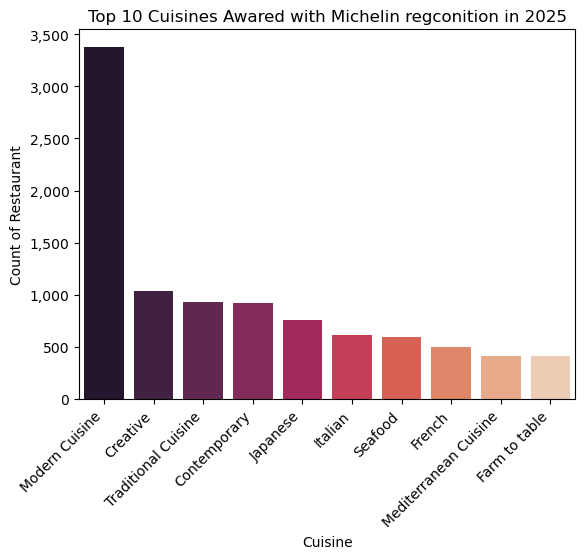

In [496]:
sns.barplot(data= df_1, x = 'Cuisine', y = 'Count', hue = 'Cuisine', palette = 'rocket')
plt.xlabel('Cuisine')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Count of Restaurant')
plt.title('Top 10 Cuisines Awared with Michelin regconition in 2025')
import matplotlib as mpl
plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()